In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy as sp
import faraway.utils

In [ ]:
import faraway.datasets.salmonella
salmonella = faraway.datasets.salmonella.load()
salmonella.head()

In [ ]:
print(faraway.datasets.salmonella.DESCR)

In [3]:
salmonella["dose"].value_counts()

0       3
10      3
33      3
100     3
333     3
1000    3
Name: dose, dtype: int64

<AxesSubplot:xlabel='dose', ylabel='colonies'>

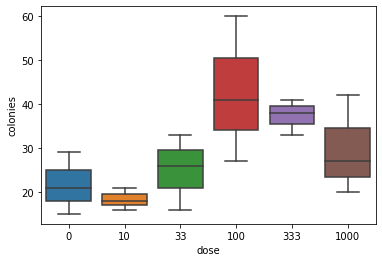

In [12]:
sns.boxplot(y="colonies", x="dose", data=salmonella)

In [14]:
import faraway.utils 
lmod = smf.ols("colonies ~ np.log(dose+1)", data=salmonella).fit()
lmod.sumary()

                  coefs stderr tvalues pvalues
Intercept        19.823  5.064    3.91  0.0012
np.log(dose + 1)  2.396  1.128    2.12  0.0495

n=18 p=2 Residual SD=10.843 R-squared=0.22


In order to check for a lack of fit, we compare $\hat\sigma^2$ to $\sigma^2$. </br>
Usually, $\sigma^2$ is unknown, so we have to estimate it somehow, model-free. </br>
The method presented in the chapter required responses for the same sets of predictors. Then, we average the variations in such groups and form an estimate. </br>
The data is precisely suitable for this.

In [15]:
%run utils.ipynb

In [42]:
salmonella["dosecat"] = salmonella["dose"].astype("category")

lmod_cat = smf.ols("colonies ~ dosecat", data=salmonella).fit()
lmod_cat.sumary()

                 coefs stderr tvalues pvalues
Intercept       21.667  5.506    3.94  0.0020
dosecat[T.10]   -3.333  7.787   -0.43  0.6762
dosecat[T.33]    3.333  7.787    0.43  0.6762
dosecat[T.100]  21.000  7.787    2.70  0.0194
dosecat[T.333]  15.667  7.787    2.01  0.0672
dosecat[T.1000]  8.000  7.787    1.03  0.3245

n=18 p=6 Residual SD=9.536 R-squared=0.55


Here is the meaning of this model:

In [43]:
lmod_cat.fittedvalues, salmonella.groupby("dosecat").mean()["colonies"]

(0     21.666667
 1     21.666667
 2     21.666667
 3     18.333333
 4     18.333333
 5     18.333333
 6     25.000000
 7     25.000000
 8     25.000000
 9     42.666667
 10    42.666667
 11    42.666667
 12    37.333333
 13    37.333333
 14    37.333333
 15    29.666667
 16    29.666667
 17    29.666667
 dtype: float64,
 dosecat
 0       21.666667
 10      18.333333
 33      25.000000
 100     42.666667
 333     37.333333
 1000    29.666667
 Name: colonies, dtype: float64)

It basically fits the mean to each group of observatons. Then the $\hat\sigma$ is equal to sum of each group's variations. </br>

In [44]:
lmod_cat.compare_f_test(lmod)

(2.1709130036358295, 0.1341968033845776, 4.0)

No significant difference between two groups. We conlcude that there is no lack of fit.

### Example from the book

In [50]:
import faraway.datasets.corrosion
corrosion = faraway.datasets.corrosion.load()
lmod = smf.ols('loss ~ Fe', corrosion).fit()
lmod.sumary()

            coefs stderr tvalues pvalues
Intercept 129.787  1.403   92.52  0.0000
Fe        -24.020  1.280  -18.77  0.0000

n=13 p=2 Residual SD=3.058 R-squared=0.97


In [53]:
corrosion["Fecat"] = corrosion["Fe"].astype("category")
lmod_cat = smf.ols("loss ~ Fecat", corrosion).fit()
lmod_cat.sumary()

                coefs stderr tvalues pvalues
Intercept     128.567  0.809  158.91  0.0000
Fecat[T.0.48]  -5.567  1.279   -4.35  0.0048
Fecat[T.0.71] -16.617  1.279  -12.99  0.0000
Fecat[T.0.95] -24.667  1.618  -15.24  0.0000
Fecat[T.1.19] -27.067  1.618  -16.73  0.0000
Fecat[T.1.44] -36.717  1.279  -28.70  0.0000
Fecat[T.1.96] -43.617  1.279  -34.10  0.0000

n=13 p=7 Residual SD=1.401 R-squared=1.00


In [63]:
a = lmod_cat.fittedvalues.value_counts()
pd.DataFrame({"mean": a.index, "#members": a.values})

,mean,#members
0,128.566667,3
1,123.000000,2
2,111.950000,2
3,91.850000,2
4,84.950000,2
5,103.900000,1
6,101.500000,1


### Cars

In [66]:
import faraway.datasets.cars
cars = faraway.datasets.cars.load()
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [67]:
print(faraway.datasets.cars.DESCR)


Speed and Stopping Distances of Cars

Description

The data give the speed of cars and the distances taken to stop. Note that the data were recorded in the 1920s.

A data frame with 50 observations on 2 variables.

speed	numeric	Speed (mph)
dist	numeric	Stopping distance (ft)

Source

Ezekiel, M. (1930) Methods of Correlation Analysis. Wiley.

References

McNeil, D. R. (1977) Interactive Data Analysis. Wiley.



In [69]:
lmod = smf.ols('dist ~ speed', cars).fit()
lmod.sumary()

            coefs stderr tvalues pvalues
Intercept -17.579  6.758   -2.60  0.0123
speed       3.932  0.416    9.46  0.0000

n=50 p=2 Residual SD=15.380 R-squared=0.65


(<Figure size 1440x504 with 2 Axes>,
 array([<AxesSubplot:xlabel='y.hat', ylabel='e.hat'>,
        <AxesSubplot:xlabel='y.hat', ylabel='sqrt(|e.hat|)'>], dtype=object))

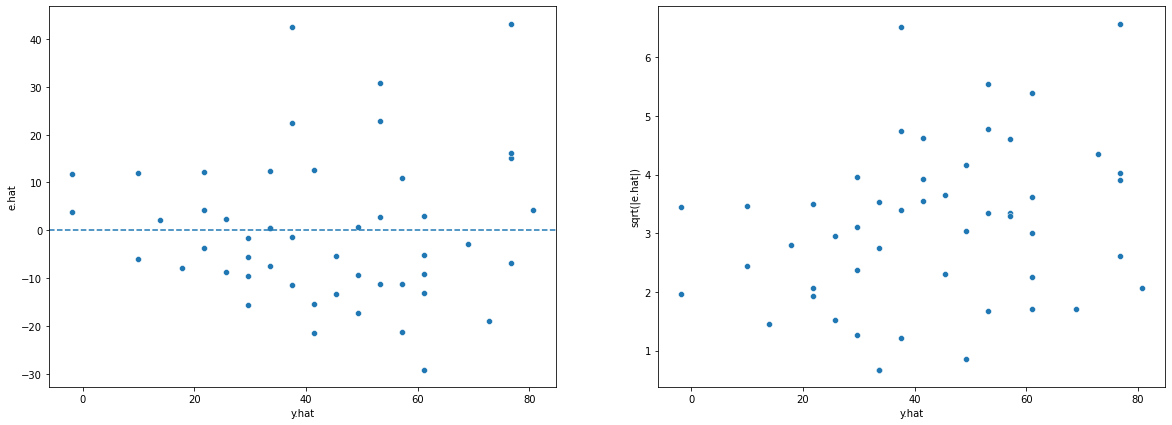

In [70]:
resid_yhat_plot(lmod)

In [73]:
cars["speed"].value_counts()

20    5
24    4
12    4
13    4
14    4
18    4
15    3
17    3
10    3
19    3
4     2
16    2
7     2
11    2
9     1
22    1
23    1
8     1
25    1
Name: speed, dtype: int64

We once again have records with the same predictor, which allows us to carry out

In [78]:
cars["speedcat"] = cars["speed"].astype("category")
lmod_cat = smf.ols("dist ~ speedcat", cars).fit()
lmod_cat.sumary()

                coefs stderr tvalues pvalues
Intercept       6.000 10.446    0.57  0.5698
speedcat[T.7]   7.000 14.772    0.47  0.6389
speedcat[T.8]  10.000 18.092    0.55  0.5844
speedcat[T.9]   4.000 18.092    0.22  0.8265
speedcat[T.10] 20.000 13.485    1.48  0.1481
speedcat[T.11] 16.500 14.772    1.12  0.2726
speedcat[T.12] 15.500 12.793    1.21  0.2348
speedcat[T.13] 29.000 12.793    2.27  0.0305
speedcat[T.14] 44.500 12.793    3.48  0.0015
speedcat[T.15] 27.333 13.485    2.03  0.0513
speedcat[T.16] 30.000 14.772    2.03  0.0509
speedcat[T.17] 34.667 13.485    2.57  0.0152
speedcat[T.18] 58.500 12.793    4.57  0.0001
speedcat[T.19] 44.000 13.485    3.26  0.0027
speedcat[T.20] 44.400 12.359    3.59  0.0011
speedcat[T.22] 60.000 18.092    3.32  0.0023
speedcat[T.23] 48.000 18.092    2.65  0.0125
speedcat[T.24] 87.750 12.793    6.86  0.0000
speedcat[T.25] 79.000 18.092    4.37  0.0001

n=50 p=19 Residual SD=14.772 R-squared=0.79


In [93]:
lmod_cat.compare_f_test(lmod)

(1.2369499182598478, 0.2948373967970451, 17.0)

Once again, no lack of fit